<a href="https://colab.research.google.com/github/abhilashhn1993/Sentiment_Analysis_of_Tweets/blob/master/TweetExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install GetOldTweets3 python library**

In [1]:
!pip install GetoldTweets3

Importing libraries

In [0]:
import GetOldTweets3 as got
import re
import string
import pandas as pd
import numpy as np
import datetime
import os


Obtaining tweets based on keyword search

In [0]:

tweetCriteria = got.manager.TweetCriteria().setQuerySearch('diagnosed with PTSD today')\
                                           .setSince("2020-01-01")\
                                           .setUntil("2020-04-04")\
                                           .setMaxTweets(1000)\
                                           .setLang('en')
tweet = got.manager.TweetManager.getTweets(tweetCriteria)


In [0]:
len(tweet)

103

**Saving the tweets into an excel file**

In [0]:
import csv
with open('/content/tweets_latest.csv', 'w') as csvFile:
    fieldnames = ['Tweets', 'Username', 'date', 'handle', 'loc']
    writer = csv.DictWriter(csvFile, fieldnames=fieldnames)
    writer.writeheader()

    for i in tweet:
                     
        # write the data to the file
        writer.writerow({'Username': i.username, 'Tweets': i.text,  
                         'date': i.date, 'handle': i.id, 'loc' : i.geo })
  

In [0]:

tweetCriteria = got.manager.TweetCriteria().setQuerySearch('diagnosed with PTSD today')\
                                           .setSince("2019-08-08")\
                                           .setUntil("2020-04-04")\
                                           .setMaxTweets(1000)\
                                           .setLang('en')
tweet3 = got.manager.TweetManager.getTweets(tweetCriteria)


In [0]:
len(tweet2)

259

In [0]:
import csv
with open('/content/tweets2.csv', 'w') as csvFile:
    fieldnames = ['Tweets', 'Username', 'date', 'hashtags']
    writer = csv.DictWriter(csvFile, fieldnames=fieldnames)
    writer.writeheader()

    for i in tweet2:
                     
        # write the data to the file
        writer.writerow({'Username': i.username, 'Tweets': i.text,  
                         'date': i.formatted_date, 'hashtags': i.hashtags  })

**Extracting Tweets based on usernames**

Using a list "batch" to append all the usernames and extract the tweets from their account

In [0]:
 batch = [['@TheEmuEmi','2017-03-25','2018-03-25'],
			['@EugeniaLeigh','2017-02-01','2018-02-01'],
				['@vkhillier','2017-01-30','2018-01-30'],
        				['@raepkg','2017-01-29','2018-01-29'],        
            				['@VOIDHAYLEE','2017-01-28','2018-01-28'],
                				['@KTMummy','2017-01-24','2018-01-24']] 

In [0]:
batch =	[['@JulFal','2017-01-18','2018-01-18'],
                        				['@CropxDust','2017-01-12','2018-01-12'],        
                            				['@leanne_losingit','2016-12-31','2017-12-31'],
                                				['@cgreenburg','2016-12-31','2017-12-31']]

In [0]:
#To import the users tweeets into a CSV file
import csv
with open('/content/tweets_of_PTSDUsers.csv', 'a') as csvFile:
  fieldnames = ['Tweets', 'Username', 'date']
  writer = csv.DictWriter(csvFile, fieldnames=fieldnames)
  writer.writeheader()
  for i in batch :
      tweetCriteria = got.manager.TweetCriteria().setUsername(i[0])\
                                    .setSince(i[1])\
                                    .setUntil(i[2])\
                                    .setMaxTweets(2000)\
                                    .setLang('en')
      tweet = got.manager.TweetManager.getTweets(tweetCriteria)
      # outF = open("/content/tweets_FromUsers.csv", "a")
      for j in tweet:
            
          # write line to output file
          writer.writerow({'Username': j.username, 'Tweets': j.text,'date': j.formatted_date })

**Performing word Cloud Analysis on the tweets**

In [0]:
import io
df_pre = pd.read_csv(io.BytesIO(uploaded['tweets_PTSD_PreDiagnosis.csv']))

Loading a file from Local machine

In [164]:
from google.colab import files
uploaded = files.upload()

Saving All_PTSD_tweets.csv to All_PTSD_tweets.csv
Saving tweets_PostDiagnosis.csv to tweets_PostDiagnosis.csv
Saving tweets_PreDiagnosis.csv to tweets_PreDiagnosis.csv


In [0]:
import io
df_post = pd.read_csv(io.BytesIO(uploaded['tweets_PostDiagnosis.csv']))
df_pre = pd.read_csv(io.BytesIO(uploaded['tweets_PreDiagnosis.csv']))
df_all = pd.read_csv(io.BytesIO(uploaded['All_PTSD_tweets.csv']))

In [145]:
df_post.head()

Username  ...                            date
0  dp3_45pm  ...  Mon Dec 09 20:31:08 +0000 2019
1  dp3_45pm  ...  Thu Nov 28 21:14:46 +0000 2019
2  dp3_45pm  ...  Tue Nov 26 15:06:03 +0000 2019
3  dp3_45pm  ...  Mon Nov 25 07:11:40 +0000 2019
4  dp3_45pm  ...  Mon Nov 25 00:44:55 +0000 2019

[5 rows x 3 columns]

In [146]:
df_pre.head()

Username  ...                            date
0  dp3_45pm  ...  Sun Jun 16 22:04:26 +0000 2019
1  dp3_45pm  ...  Sun Jun 16 22:02:49 +0000 2019
2  dp3_45pm  ...  Sun Jun 16 20:15:48 +0000 2019
3  dp3_45pm  ...  Sat Jun 15 20:34:30 +0000 2019
4  dp3_45pm  ...  Sat Jun 15 19:08:54 +0000 2019

[5 rows x 3 columns]

In [147]:
df_all.head()

Username  ...                            date
0  TheAlleykins  ...  Fri Jul 12 23:07:24 +0000 2019
1  TheAlleykins  ...  Fri Jul 12 23:05:39 +0000 2019
2  TheAlleykins  ...  Fri Jul 12 22:24:41 +0000 2019
3  TheAlleykins  ...  Fri Jul 12 16:27:55 +0000 2019
4  TheAlleykins  ...  Fri Jul 12 16:22:17 +0000 2019

[5 rows x 3 columns]

In [0]:
post_diag_words = ' '.join([text for text in df_post['Tweets']])
pre_diag_words = '\\n'.join([text for text in df_pre['Tweets']])
all_words = ' '.join([text for text in df_all['Tweets']])

In [68]:
 pip install wordcloud

In [0]:
from wordcloud import WordCloud


In [0]:
import matplotlib.pyplot as plt

Pre Diagnosis Words

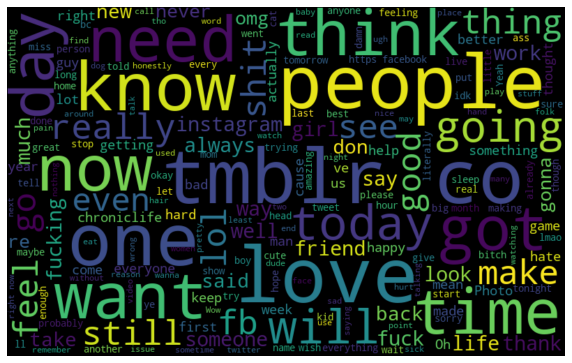

In [71]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pre_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Post Diagnosis Words

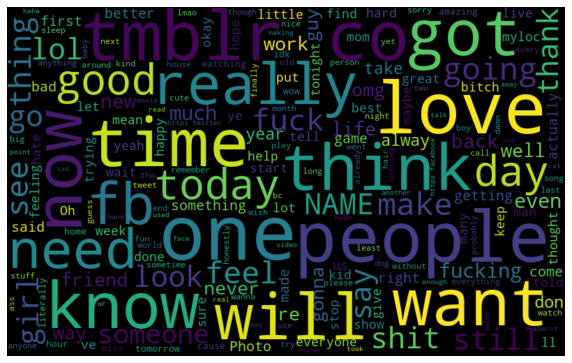

In [72]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(post_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

All Tweets Words

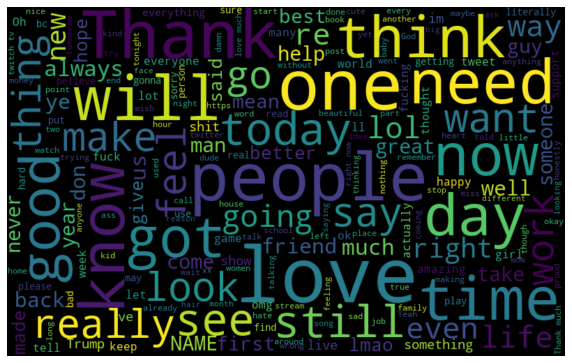

In [74]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Data cleaning

In [0]:
import pandas as pd
import re

# data cleaning
# start process_tweet

def processTweet(tweet):
    # process the tweets

    # Convert to lower case
    tweet = tweet.lower()
    # Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)
    # Convert @username to AT_USER
    tweet = re.sub('@[^\s]+', ' ', tweet)
    # Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    # Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    # Replace -word with word
    tweet = re.sub(r'-([^\s]+)', r'\1', tweet)
    # Remove &amp; , &lt; , &quot; , &gt;
    tweet = re.sub("&[a-z]+;", "", tweet)
    # Remove excess *, . , and ?
    tweet = re.sub('(\*+)', '', tweet)
    tweet = re.sub('(\.+)', '', tweet)
    tweet = re.sub('(\?+)', '', tweet)
    # trim
    tweet = tweet.strip('\'"')

    

    return tweet


# end



In [151]:
df_pre["Tweets"] = df_pre["Tweets"].apply(processTweet)
df_post["Tweets"] = df_post["Tweets"].apply(processTweet)
df_all["Tweets"] = df_all["Tweets"].apply(processTweet)

AttributeError: ignored

In [118]:
df_pre["Tweets"] = df_pre["Tweets"].apply(processTweet)

AttributeError: ignored

In [0]:
from google.colab import files
df_pre.to_csv('predata.csv')
df_post.to_csv('postdata.csv')
df_all.to_csv('allTweets.csv')

In [0]:
files.download('predata.csv')
files.download('postdata.csv')
files.download('allTweets.csv')

In [0]:
import io
df_post = pd.read_csv(io.BytesIO(uploaded['tweets_PostDiagnosis.csv']), dtype = str)
df_pre = pd.read_csv(io.BytesIO(uploaded['tweets_PreDiagnosis.csv']), dtype = str)
df_all = pd.read_csv(io.BytesIO(uploaded['All_PTSD_tweets.csv']), dtype = str)

In [134]:
df_post.head()

Username  ...                            date
0  dp3_45pm  ...  Mon Dec 09 20:31:08 +0000 2019
1  dp3_45pm  ...  Thu Nov 28 21:14:46 +0000 2019
2  dp3_45pm  ...  Tue Nov 26 15:06:03 +0000 2019
3  dp3_45pm  ...  Mon Nov 25 07:11:40 +0000 2019
4  dp3_45pm  ...  Mon Nov 25 00:44:55 +0000 2019

[5 rows x 3 columns]

In [0]:
df_post['Tweets'] = df_post.Tweets.str.replace('[^a-zA-Z0-9 ]', '')
df_post['Tweets'] = df_post.Tweets.str.replace('[^a-zA-Z0-9]', '')

In [136]:
df_post.head()

Username  ...                            date
0  dp3_45pm  ...  Mon Dec 09 20:31:08 +0000 2019
1  dp3_45pm  ...  Thu Nov 28 21:14:46 +0000 2019
2  dp3_45pm  ...  Tue Nov 26 15:06:03 +0000 2019
3  dp3_45pm  ...  Mon Nov 25 07:11:40 +0000 2019
4  dp3_45pm  ...  Mon Nov 25 00:44:55 +0000 2019

[5 rows x 3 columns]

Lemmatization and Stop words removal

In [155]:
!pip install gensim
!pip install spacy

In [157]:
!pip install en_core_web_sm

In [0]:
import pandas as pd
import numpy as np
import scipy as sp
import re
import string
import datetime
import pickle
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from gensim import matutils, models
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import scipy.sparse
from nltk import word_tokenize, pos_tag
from sklearn.feature_extraction import text
import spacy
import en_core_web_sm

In [159]:
print(df_pre.shape)
df_pre.head()

(26086, 3)


Username  ...                            date
0  dp3_45pm  ...  Sun Jun 16 22:04:26 +0000 2019
1  dp3_45pm  ...  Sun Jun 16 22:02:49 +0000 2019
2  dp3_45pm  ...  Sun Jun 16 20:15:48 +0000 2019
3  dp3_45pm  ...  Sat Jun 15 20:34:30 +0000 2019
4  dp3_45pm  ...  Sat Jun 15 19:08:54 +0000 2019

[5 rows x 3 columns]

In [160]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [206]:
 set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [0]:
cachedStopWords = stopwords.words("english")
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

In [167]:
for i in range(df_pre.shape[0]):
    df_pre.iloc[i,1] = re.sub(r'#\w+', ' ', df_pre.iloc[i,1])
    df_pre.iloc[i,1] = re.sub(r'@\w+', ' ', df_pre.iloc[i,1])
    df_pre.iloc[i,1] = re.sub(r'https\S+',' ',df_pre.iloc[i,1])
    df_pre.iloc[i,1] = re.sub(r'http\S+',' ',df_pre.iloc[i,1])
    df_pre.iloc[i,1] = re.sub('[^a-zA-Z]',' ',df_pre.iloc[i,1]).lower() #removes non alphaphets
    df_pre.iloc[i,1] = re.sub('\s+',' ', df_pre.iloc[i,1]) #consecutive white space are removed
    df_pre.iloc[i,1] = re.sub(r'\b\w*(.)\1{2,}\w*\b','', df_pre.iloc[i,1]) #removes words with a character consecutively repeating 3 times
    df_pre.iloc[i,1] = ' '.join([token.lemma_ for token in nlp(df_pre.iloc[i,1])])
    df_pre.iloc[i,1] = ' '.join([word for word in df_pre.iloc[i,1].split() if word not in cachedStopWords]) #removing stopwords
    df_pre.iloc[i,1] = re.sub(r'\b\w{1,2}\b', '', df_pre.iloc[i,1]) #removing words with 2 or less elements
    df_pre.iloc[i,1] = re.sub('\s+',' ', df_pre.iloc[i,1]) #removing 2 or more consecutive white space
df_pre.to_csv("cleaned_pre.csv", index=False)
print(df_pre.head(5))

   Username  ...                            date
0  dp3_45pm  ...  Sun Jun 16 22:04:26 +0000 2019
1  dp3_45pm  ...  Sun Jun 16 22:02:49 +0000 2019
2  dp3_45pm  ...  Sun Jun 16 20:15:48 +0000 2019
3  dp3_45pm  ...  Sat Jun 15 20:34:30 +0000 2019
4  dp3_45pm  ...  Sat Jun 15 19:08:54 +0000 2019

[5 rows x 3 columns]


In [171]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_pre.csv to cleaned_pre.csv


In [0]:
import io
cleaned_pre = pd.read_csv(io.BytesIO(uploaded['cleaned_pre.csv']))

In [0]:
pre_diag_words = '\\n'.join([text for text in cleaned_pre['Tweets']])

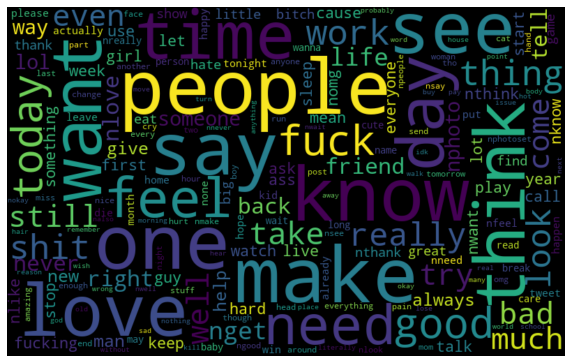

In [190]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pre_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [191]:
plt.savefig("pre_diag.jpg")
files.download("pre_diag.jpg") 

<Figure size 432x288 with 0 Axes>

For Post Diagnosis tweets

In [177]:
df_post.head()

Username  ...                            date
0  dp3_45pm  ...  Mon Dec 09 20:31:08 +0000 2019
1  dp3_45pm  ...  Thu Nov 28 21:14:46 +0000 2019
2  dp3_45pm  ...  Tue Nov 26 15:06:03 +0000 2019
3  dp3_45pm  ...  Mon Nov 25 07:11:40 +0000 2019
4  dp3_45pm  ...  Mon Nov 25 00:44:55 +0000 2019

[5 rows x 3 columns]

In [0]:
ChoosenStopWords = stopwords.words("english")
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

In [178]:
for i in range(df_post.shape[0]):
    df_post.iloc[i,1] = re.sub(r'#\w+', ' ', df_post.iloc[i,1])
    df_post.iloc[i,1] = re.sub(r'@\w+', ' ', df_post.iloc[i,1])
    df_post.iloc[i,1] = re.sub(r'https\S+',' ',df_post.iloc[i,1])
    df_post.iloc[i,1] = re.sub(r'http\S+',' ',df_post.iloc[i,1])
    df_post.iloc[i,1] = re.sub('[^a-zA-Z]',' ',df_post.iloc[i,1]).lower() #removes non alphaphets
    df_post.iloc[i,1] = re.sub('\s+',' ', df_post.iloc[i,1]) #consecutive white space are removed
    df_post.iloc[i,1] = re.sub(r'\b\w*(.)\1{2,}\w*\b','', df_post.iloc[i,1]) #removes words with a character consecutively repeating 3 times
    df_post.iloc[i,1] = ' '.join([token.lemma_ for token in nlp(df_post.iloc[i,1])])
    df_post.iloc[i,1] = ' '.join([word for word in df_post.iloc[i,1].split() if word not in cachedStopWords]) #removing stopwords
    df_post.iloc[i,1] = re.sub(r'\b\w{1,2}\b', '', df_post.iloc[i,1]) #removing words with 2 or less elements
    df_post.iloc[i,1] = re.sub('\s+',' ', df_post.iloc[i,1]) #removing 2 or more consecutive white space
df_post.to_csv("cleaned_post.csv", index=False)
print(df_post.head(5))

   Username  ...                            date
0  dp3_45pm  ...  Mon Dec 09 20:31:08 +0000 2019
1  dp3_45pm  ...  Thu Nov 28 21:14:46 +0000 2019
2  dp3_45pm  ...  Tue Nov 26 15:06:03 +0000 2019
3  dp3_45pm  ...  Mon Nov 25 07:11:40 +0000 2019
4  dp3_45pm  ...  Mon Nov 25 00:44:55 +0000 2019

[5 rows x 3 columns]


In [0]:
files.download('cleaned_post.csv')

In [183]:
from google.colab import files
uploaded = files.upload('cleaned')

TypeError: ignored

In [0]:
import io
cleaned_post = pd.read_csv(io.BytesIO(uploaded['postDiagTweets.csv']))

In [0]:
post_diag_words = '\\n'.join([text for text in cleaned_post['Tweets']])

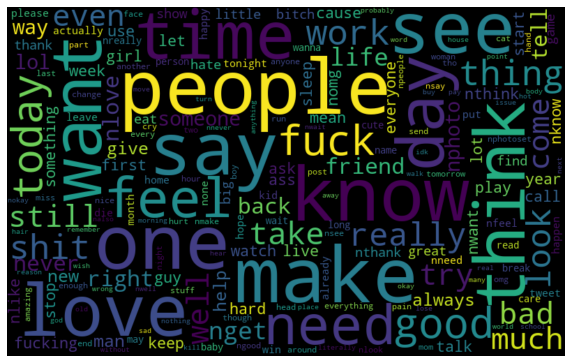

In [192]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pre_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

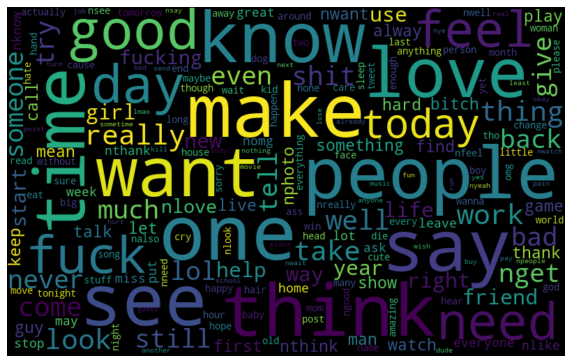

In [186]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(post_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
cvec = CountVectorizer()

In [0]:
cv_data = cvec.fit_transform(df_pre.Tweets)
df_pre_cv = pd.DataFrame(cv_data.toarray(), columns=cvec.get_feature_names())
df_pre_cv.index = df_pre.index


In [198]:
print(df_pre_cv.shape)
df_pre_cv

(26083, 14944)


aahh  aaliyah  aarda  aaron  ...  zukos  zuriya  zuul  zwarte
0         0        0      0      0  ...      0       0     0       0
1         0        0      0      0  ...      0       0     0       0
2         0        0      0      0  ...      0       0     0       0
3         0        0      0      0  ...      0       0     0       0
4         0        0      0      0  ...      0       0     0       0
...     ...      ...    ...    ...  ...    ...     ...   ...     ...
26078     0        0      0      0  ...      0       0     0       0
26079     0        0      0      0  ...      0       0     0       0
26080     0        0      0      0  ...      0       0     0       0
26081     0        0      0      0  ...      0       0     0       0
26082     0        0      0      0  ...      0       0     0       0

[26083 rows x 14944 columns]

In [0]:
dt = df_pre_cv.transpose()
top_vals_dict = {}

In [202]:
for col in dt.columns:
    top = dt[col].sort_values(ascending=False).head(5)
    top_vals_dict[col]= list(zip(top.index, top.values))
top_vals_dict

{0: [('lucky', 2), ('damn', 1), ('read', 1), ('think', 1), ('hell', 1)],
 1: [('support', 1), ('luck', 1), ('ray', 1), ('good', 1), ('send', 1)],
 2: [('stan', 4), ('kpop', 2), ('concept', 2), ('think', 1), ('little', 1)],
 3: [('mega', 1), ('folder', 1), ('year', 1), ('delete', 1), ('franklin', 0)],
 4: [('tip', 2), ('tap', 2), ('lazy', 1), ('wear', 1), ('kid', 1)],
 5: [('right', 1),
  ('one', 1),
  ('fragrance', 0),
  ('fransico', 0),
  ('franklin', 0)],
 6: [('sebastian', 2),
  ('movie', 2),
  ('watch', 2),
  ('actually', 1),
  ('everybody', 1)],
 7: [('even', 1),
  ('know', 1),
  ('block', 1),
  ('framing', 0),
  ('franzferdinand', 0)],
 8: [('hand', 1), ('look', 1), ('bigbang', 1), ('like', 1), ('second', 1)],
 9: [('anybody', 1),
  ('interesting', 1),
  ('picture', 1),
  ('zwarte', 0),
  ('franklin', 0)],
 10: [('cold', 1),
  ('nipple', 1),
  ('zwarte', 0),
  ('frame', 0),
  ('fransico', 0)],
 11: [('hair', 1), ('omg', 1), ('zwarte', 0), ('frame', 0), ('fransico', 0)],
 12: [('g

In [0]:
sparse_counts = scipy.sparse.csr_matrix(dt)
corpus = matutils.Sparse2Corpus(sparse_counts)
id2word = dict((v, k) for k, v in cvec.vocabulary_.items())

In [205]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=50)
lda.print_topics()

[(0,
  '0.013*"make" + 0.012*"wanna" + 0.012*"photoset" + 0.011*"help" + 0.009*"actually" + 0.009*"get" + 0.009*"sorry" + 0.009*"come" + 0.008*"seriously" + 0.008*"game"'),
 (1,
  '0.026*"get" + 0.017*"friend" + 0.016*"omg" + 0.013*"like" + 0.012*"girl" + 0.011*"weight" + 0.010*"bad" + 0.010*"eat" + 0.010*"literally" + 0.010*"shit"'),
 (2,
  '0.031*"love" + 0.020*"photo" + 0.020*"get" + 0.012*"thank" + 0.010*"much" + 0.010*"people" + 0.010*"day" + 0.009*"want" + 0.009*"time" + 0.009*"year"'),
 (3,
  '0.019*"want" + 0.015*"good" + 0.015*"like" + 0.012*"know" + 0.011*"see" + 0.011*"get" + 0.010*"think" + 0.010*"fat" + 0.010*"need" + 0.010*"talk"'),
 (4,
  '0.023*"like" + 0.022*"feel" + 0.012*"lose" + 0.011*"make" + 0.010*"pound" + 0.008*"ass" + 0.008*"live" + 0.007*"get" + 0.007*"look" + 0.007*"idk"')]